<a href="https://colab.research.google.com/github/itsmeharshit554/Image_classifcation_cnn/blob/main/Final_tomato2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
len(gpus)

1

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data_path ="/content/drive/MyDrive/training_data"
os.listdir(data_path)

['Tomato___Tomato_mosaic_virus',
 'Tomato___Late_blight',
 'Tomato___Bacterial_spot',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Leaf_Mold']

In [6]:
img_ext=["jpeg","jpg","bmp","png"]
# image extentions list

In [7]:
# Remove corrupted images from dataset
for image_class in os.listdir(data_path):
    for image in os.listdir(os.path.join(data_path, image_class)):
        image_path = os.path.join(data_path, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_ext:
                print(f"Image not in ext list {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with image {image_path}")

In [8]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data=tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/training_data",image_size=(228,228))

Found 15600 files belonging to 10 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()
batch

(array([[[[140.15921 , 141.15921 , 162.15921 ],
          [138.73291 , 139.73291 , 160.73291 ],
          [127.42651 , 128.42651 , 149.42651 ],
          ...,
          [ 98.54128 ,  93.54128 , 115.54128 ],
          [ 96.48131 ,  91.48131 , 113.48131 ],
          [102.03264 ,  97.03264 , 119.03264 ]],
 
         [[127.111496, 128.1115  , 149.1115  ],
          [129.59557 , 130.59557 , 151.59557 ],
          [125.458916, 126.458916, 147.45891 ],
          ...,
          [ 96.01365 ,  91.01365 , 113.01365 ],
          [ 91.83862 ,  86.83862 , 108.83862 ],
          [ 92.554016,  87.554016, 109.554016]],
 
         [[132.59064 , 133.59064 , 154.59065 ],
          [125.81972 , 126.81972 , 147.81972 ],
          [128.72246 , 129.72246 , 150.72246 ],
          ...,
          [ 99.03957 ,  94.03957 , 116.03957 ],
          [ 93.05652 ,  88.05652 , 110.05652 ],
          [ 89.62542 ,  84.62542 , 106.62542 ]],
 
         ...,
 
         [[161.18123 , 166.18123 , 188.18123 ],
          [157.856

In [13]:
len(batch)
# will print the groups in which dataset is classified

2

In [14]:
batch[1]

array([3, 7, 1, 9, 0, 8, 6, 9, 9, 2, 8, 0, 3, 9, 7, 5, 8, 6, 0, 4, 1, 9,
       4, 9, 3, 1, 9, 6, 6, 1, 2, 5], dtype=int32)

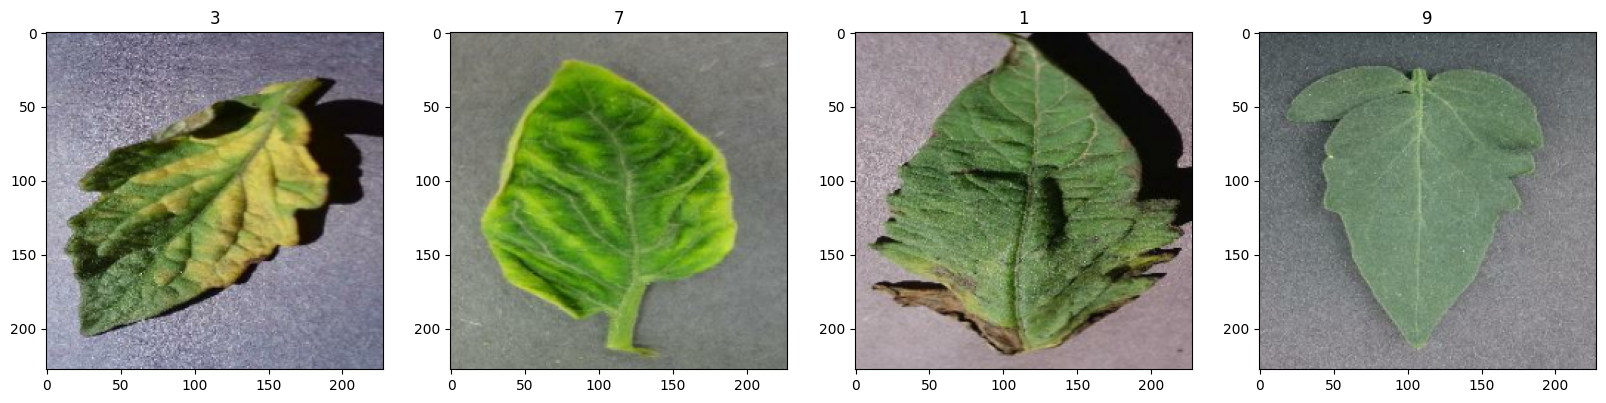

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
data = data.map(lambda x,y: (x/255, y))
scaled_iterator=data.as_numpy_iterator()


In [17]:
scaled_iterator1=scaled_iterator.next()
scaled_iterator1


(array([[[[0.66916   , 0.641709  , 0.6730816 ],
          [0.49794325, 0.47049227, 0.50186485],
          [0.61124873, 0.58379775, 0.6151703 ],
          ...,
          [0.77112657, 0.7515187 , 0.77504814],
          [0.75182515, 0.7322173 , 0.7557467 ],
          [0.71288985, 0.693282  , 0.7168114 ]],
 
         [[0.5600637 , 0.53261274, 0.5639853 ],
          [0.5366602 , 0.5092092 , 0.54058176],
          [0.58623564, 0.55878466, 0.5901572 ],
          ...,
          [0.7063068 , 0.686699  , 0.7102284 ],
          [0.7481074 , 0.72849953, 0.75202894],
          [0.72103804, 0.7014302 , 0.7249596 ]],
 
         [[0.5625592 , 0.5351082 , 0.56648076],
          [0.5931282 , 0.5656772 , 0.5970498 ],
          [0.6250647 , 0.5976137 , 0.62898624],
          ...,
          [0.70647407, 0.6868662 , 0.71039563],
          [0.7627498 , 0.74314195, 0.76667136],
          [0.7235052 , 0.70389736, 0.72742677]],
 
         ...,
 
         [[0.45127094, 0.4198984 , 0.46303564],
          [0.45031

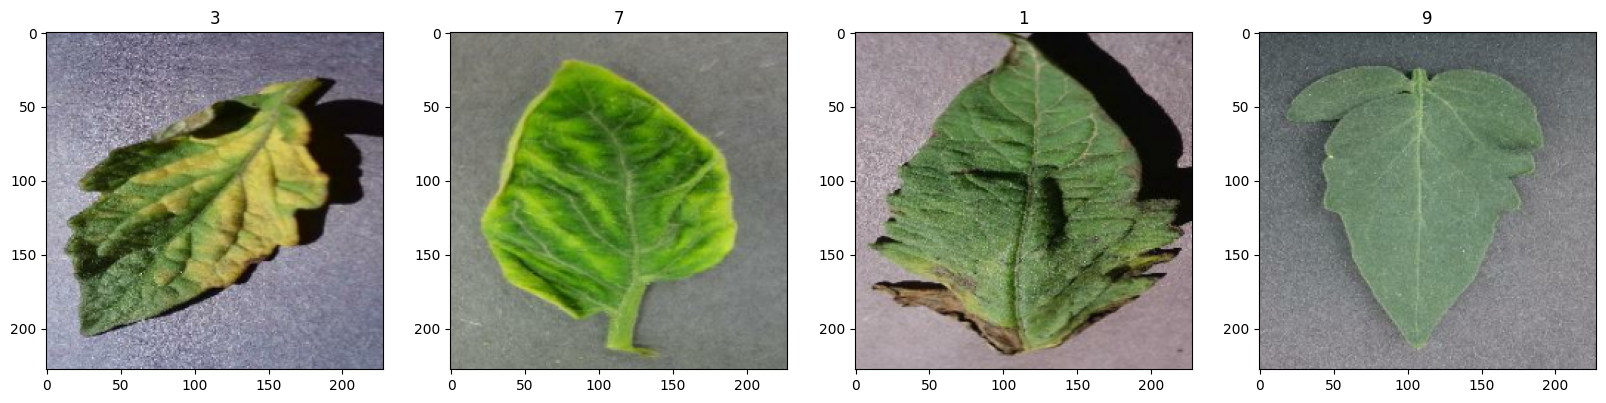

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
# Split data into train, validation, and test sets
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)


In [20]:
# train_size = int(len(data)*.7)
# val_size = int(len(data)*.2)
# test_size = int(len(data)*.1)
'''
train_set = train_datagen.flow_from_directory(data_path, target_size=(228, 228), batch_size=32, class_mode="sparse")
val_set = train_datagen.flow_from_directory(data_path, target_size=(228, 228), batch_size=32, class_mode="sparse")
test_set = train_datagen.flow_from_directory(data_path, target_size=(228, 228), batch_size=32, class_mode="sparse")
'''

'\ntrain_set = train_datagen.flow_from_directory(data_path, target_size=(228, 228), batch_size=32, class_mode="sparse")\nval_set = train_datagen.flow_from_directory(data_path, target_size=(228, 228), batch_size=32, class_mode="sparse")\ntest_set = train_datagen.flow_from_directory(data_path, target_size=(228, 228), batch_size=32, class_mode="sparse")\n'

In [21]:
# Split data into train, validation, and test sets
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)

train_set = train_datagen.flow_from_directory(
    data_path,
    target_size=(228, 228),
    batch_size=batch_size,
    class_mode="sparse",
    subset='training')

val_set = train_datagen.flow_from_directory(
    data_path,
    target_size=(228, 228),
    batch_size=batch_size,
    class_mode="sparse",
    subset='validation')

test_set = train_datagen.flow_from_directory(
    data_path,
    target_size=(228, 228),
    batch_size=batch_size,
    class_mode="sparse")
    
print("Number of training samples:", train_set.n)
print("Number of validation samples:", val_set.n)
print("Number of testing samples:", test_set.n)


Found 12482 images belonging to 10 classes.
Found 3118 images belonging to 10 classes.
Found 15600 images belonging to 10 classes.
Number of training samples: 12482
Number of validation samples: 3118
Number of testing samples: 15600


In [22]:
print("Number of training samples:", train_set.n)
print("Number of validation samples:", val_set.n)
print("Number of testing samples:", test_set.n)

Number of training samples: 12482
Number of validation samples: 3118
Number of testing samples: 15600


In [23]:
# Build model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(228, 228, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))


In [26]:
# Compile model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train model
epochs = 10
history = model.fit(train_set, epochs=epochs, validation_data=val_set)


Epoch 1/10
391/391 [==============================] - 226s 575ms/step - loss: 0.3299 - accuracy: 0.8849 - val_loss: 0.5218 - val_accuracy: 0.8268
Epoch 2/10
391/391 [==============================] - 263s 673ms/step - loss: 0.3008 - accuracy: 0.8932 - val_loss: 0.4155 - val_accuracy: 0.8643
Epoch 3/10
391/391 [==============================] - 229s 586ms/step - loss: 0.2927 - accuracy: 0.8974 - val_loss: 0.3247 - val_accuracy: 0.8967
Epoch 4/10
391/391 [==============================] - 226s 577ms/step - loss: 0.2635 - accuracy: 0.9120 - val_loss: 0.4165 - val_accuracy: 0.8691
Epoch 5/10
391/391 [==============================] - 263s 672ms/step - loss: 0.2602 - accuracy: 0.9116 - val_loss: 0.3551 - val_accuracy: 0.8855
Epoch 6/10
391/391 [==============================] - 226s 579ms/step - loss: 0.2452 - accuracy: 0.9158 - val_loss: 0.3660 - val_accuracy: 0.8842
Epoch 7/10
391/391 [==============================] - 225s 576ms/step - loss: 0.2405 - accuracy: 0.9160 - val_loss: 0.2871 -

In [83]:
# Evaluate model
score = model.evaluate(test_set)

488/488 [==============================] - 245s 503ms/step - loss: 0.2625 - accuracy: 0.9125


In [84]:
history.history

{'loss': [0.32985028624534607,
  0.30077365040779114,
  0.2927406132221222,
  0.26352396607398987,
  0.26024624705314636,
  0.24515554308891296,
  0.24049201607704163,
  0.23469358682632446,
  0.2083156704902649,
  0.21068336069583893],
 'accuracy': [0.8848742246627808,
  0.8932062387466431,
  0.8973722457885742,
  0.9119532108306885,
  0.911632776260376,
  0.9157987236976624,
  0.9160391092300415,
  0.9165999293327332,
  0.9264540672302246,
  0.9273353815078735],
 'val_loss': [0.5218203663825989,
  0.41552025079727173,
  0.32473060488700867,
  0.4165096879005432,
  0.3551018238067627,
  0.3659927248954773,
  0.28707534074783325,
  0.3761826157569885,
  0.37916937470436096,
  0.4563369154930115],
 'val_accuracy': [0.8268120884895325,
  0.8643361330032349,
  0.8967286944389343,
  0.8691468834877014,
  0.8855035305023193,
  0.8842206597328186,
  0.9124438762664795,
  0.8806927800178528,
  0.8790891766548157,
  0.8588839173316956]}

In [85]:
# Print model accuracy and loss
print(f"Test Accuracy: {score[1]*100:.2f}%")
print(f"Test Loss: {score[0]:.4f}")

Test Accuracy: 91.25%
Test Loss: 0.2625


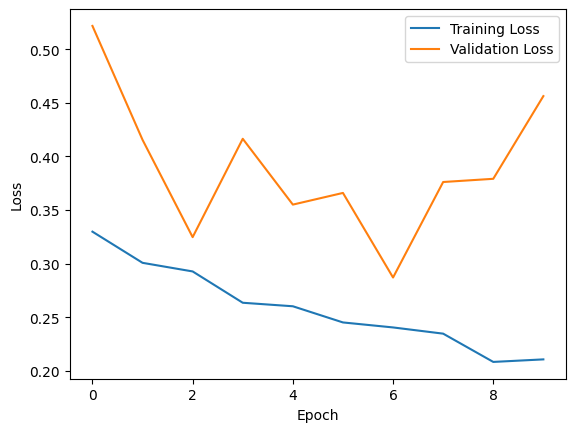

In [86]:
# Plot accuracy and loss curves
'''
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()
'''

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

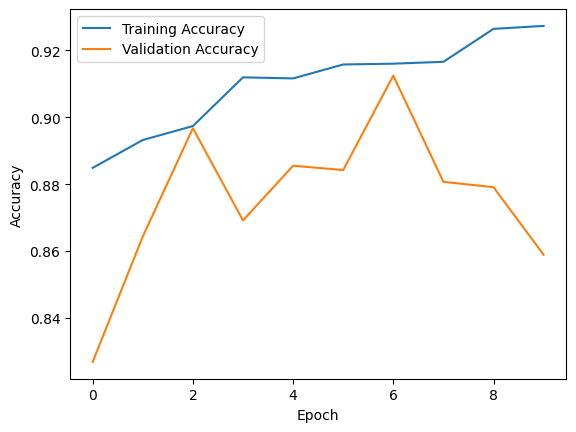

In [87]:
'''
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()
'''

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
pre[0]

**Saving the CNN Model**

In [88]:
from tensorflow.keras.models import load_model

In [34]:
# model.save("/content/drive/MyDrive/final_tomato.h5")

In [89]:
load_mod=load_model("/content/drive/MyDrive/final_tomato.h5")
load_mod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 226, 226, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 113, 113, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 96800)             0         
                                                                 
 dense (Dense)               (None, 128)               1

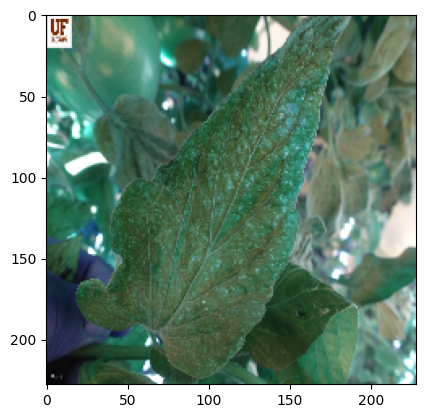

In [90]:
import cv2
import matplotlib.pyplot as plt

temp = cv2.imread('/content/1-65.png')
img=cv2.resize(temp,(228,228))
plt.imshow(img)
plt.show()

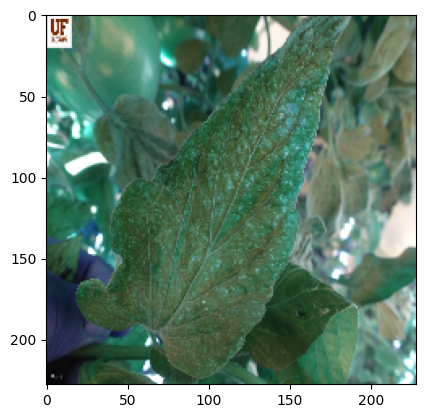

In [91]:
resize = tf.image.resize(img, (228,228))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [92]:
pip install keras-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [93]:
pip install imagepreprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
pip install Keras-Applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
train_set.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [121]:
ref=dict(zip(list(train_set.class_indices.values()), list(train_set.class_indices.keys())))
ref


{0: 'Tomato___Bacterial_spot',
 1: 'Tomato___Early_blight',
 2: 'Tomato___Late_blight',
 3: 'Tomato___Leaf_Mold',
 4: 'Tomato___Septoria_leaf_spot',
 5: 'Tomato___Spider_mites Two-spotted_spider_mite',
 6: 'Tomato___Target_Spot',
 7: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 8: 'Tomato___Tomato_mosaic_virus',
 9: 'Tomato___healthy'}

In [103]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import img_to_array, load_img
from keras.preprocessing import image



In [113]:
def prediction(path):
  image = load_img(path, target_size=(228, 228))
  i = img_to_array(image)
  im = preprocess_input(i)
  print(im.shape)
  imgg = np.expand_dims(im, axis=0)
  print(imgg.shape)
  pred = np.argmax(model.predict(imgg))
  
  print(pred)
  if pred==9:
    print("Your Tomato's are healthy")
  else:
    print(f"Your Tomato's is suffering from {ref[pred]}")


In [119]:
tempo='/content/sep.jpg'
# this is Tomato___Septoria_leaf_spot
prediction(tempo)

(228, 228, 3)
(1, 228, 228, 3)
1/1 [==============================] - 0s 19ms/step
4
Your Tomato's is suffering from Tomato___Septoria_leaf_spot


In [120]:
te='/content/Halo-2-3-1080x675-1.jpg'
# this is late blight
prediction(te)

(228, 228, 3)
(1, 228, 228, 3)
1/1 [==============================] - 0s 20ms/step
4
Your Tomato's is suffering from Tomato___Septoria_leaf_spot
